In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# 读取
train = pd.read_csv('../input/train_dataset.csv')
test = pd.read_csv('../input/test_dataset.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
用户编码               50000 non-null object
用户实名制是否通过核实        50000 non-null int64
用户年龄               50000 non-null int64
是否大学生客户            50000 non-null int64
是否黑名单客户            50000 non-null int64
是否4G不健康客户          50000 non-null int64
用户网龄（月）            50000 non-null int64
用户最近一次缴费距今时长（月）    50000 non-null int64
缴费用户最近一次缴费金额（元）    50000 non-null float64
用户近6个月平均消费值（元）     50000 non-null float64
用户账单当月总费用（元）       50000 non-null float64
用户当月账户余额（元）        50000 non-null int64
缴费用户当前是否欠费缴费       50000 non-null int64
用户话费敏感度            50000 non-null int64
当月通话交往圈人数          50000 non-null int64
是否经常逛商场的人          50000 non-null int64
近三个月月均商场出现次数       50000 non-null int64
当月是否逛过福州仓山万达       50000 non-null int64
当月是否到过福州山姆会员店      50000 non-null int64
当月是否看电影            50000 non-null int64
当月是否景点游览           50000 non-null int64
当月是否体育场馆消费         50000 non-null int64
当月网购

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
用户编码               50000 non-null object
用户实名制是否通过核实        50000 non-null int64
用户年龄               50000 non-null int64
是否大学生客户            50000 non-null int64
是否黑名单客户            50000 non-null int64
是否4G不健康客户          50000 non-null int64
用户网龄（月）            50000 non-null int64
用户最近一次缴费距今时长（月）    50000 non-null int64
缴费用户最近一次缴费金额（元）    50000 non-null float64
用户近6个月平均消费值（元）     50000 non-null float64
用户账单当月总费用（元）       50000 non-null float64
用户当月账户余额（元）        50000 non-null int64
缴费用户当前是否欠费缴费       50000 non-null int64
用户话费敏感度            50000 non-null int64
当月通话交往圈人数          50000 non-null int64
是否经常逛商场的人          50000 non-null int64
近三个月月均商场出现次数       50000 non-null int64
当月是否逛过福州仓山万达       50000 non-null int64
当月是否到过福州山姆会员店      50000 non-null int64
当月是否看电影            50000 non-null int64
当月是否景点游览           50000 non-null int64
当月是否体育场馆消费         50000 non-null int64
当月网购

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


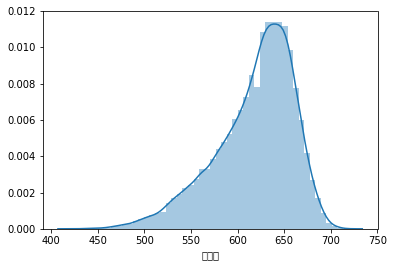

In [5]:
#看一下标签的分布
sns.distplot(train['信用分'])

In [6]:
train.head()

,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
0,a4651f98c82948b186bdcdc8108381b4,1,44,0,0,0,186,1,99.80,163.86,159.20,180,0,3,83,1,75,0,0,0,1,1,713,0,2740,7145,0,0,30,664
1,aeb10247db4e4d67b2550bbc42ff9827,1,18,0,0,1,5,1,29.94,153.28,145.10,110,0,3,21,1,16,0,0,0,0,0,414,0,2731,44862,0,0,0,530
2,5af23a1e0e77410abb25e9a7eee510aa,1,47,0,0,0,145,1,49.90,109.64,120.20,70,0,1,59,0,1,0,0,0,0,0,3391,0,0,4804,0,0,1,643
3,43c64379d3c24a15b8478851b22049e4,1,55,0,0,0,234,1,99.80,92.97,167.42,90,0,3,78,1,26,0,0,0,1,1,500,0,1931,3141,0,0,5,649
4,f1687f3b8a6f4910bd0b13eb634056e2,1,40,0,0,0,76,1,49.90,95.47,101.00,80,0,3,70,1,44,0,0,0,1,0,522,0,64,59,0,0,0,648


In [7]:
train.describe()

,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.99022,37.883440,0.003720,0.048800,0.088580,96.448680,0.700100,53.415929,98.732081,99.575130,114.172400,0.052540,3.351920,48.054500,0.329500,26.572520,0.038700,0.027120,0.242280,0.47442,0.37412,1148.815260,1.197840,971.50308,3.366519e+03,0.704420,0.553340,19.117120,618.053060
std,0.09841,11.613239,0.060879,0.215452,0.284139,59.176593,0.458218,61.812022,60.757758,65.327335,304.063961,0.223116,1.241202,54.208524,0.470036,32.789251,0.192881,0.162435,0.428467,0.49935,0.48390,3992.957952,44.469584,3006.16776,1.151006e+04,28.721302,7.735913,170.074772,42.443022
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,422.000000
25%,1.00000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,40.000000,0.000000,2.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,18.000000,0.000000,6.00000,1.000000e+01,0.000000,0.000000,0.000000,594.000000
50%,1.00000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,70.000000,0.000000,4.000000,32.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.00000,0.00000,250.000000,0.000000,267.00000,3.350000e+02,0.000000,0.000000,0.000000,627.000000
75%,1.00000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,130.000000,0.000000,4.000000,61.000000,1.000000,50.000000,0.000000,0.000000,0.000000,1.00000,1.00000,932.000000,0.000000,1147.25000,2.423250e+03,0.000000,0.000000,4.000000,649.000000
max,1.00000,111.000000,1.000000,1.000000,1.000000,288.000000,1.000000,998.000000,840.570000,1164.290000,49040.000000,1.000000,5.000000,1906.000000,1.000000,92.000000,1.000000,1.000000,1.000000,1.00000,1.00000,234336.000000,8235.000000,496238.00000,1.382227e+06,5856.000000,474.000000,13965.000000,719.000000


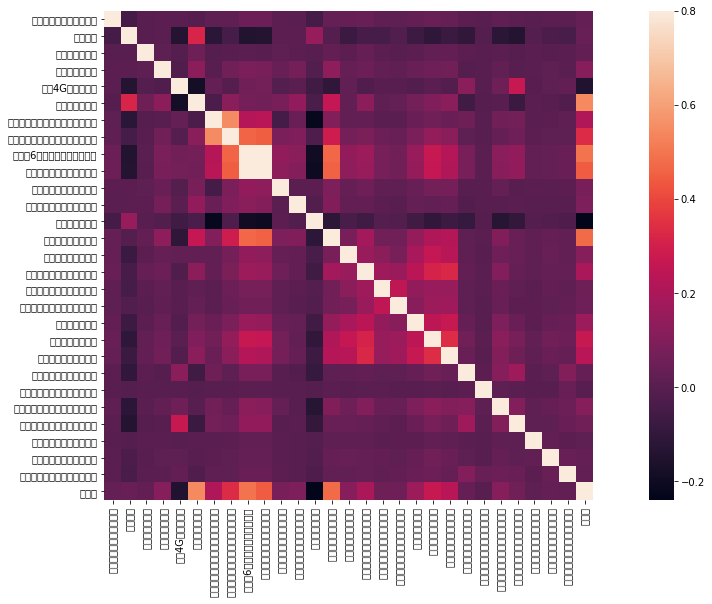

In [8]:
#相关性分析
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [9]:
(train['用户年龄']==0).value_counts()

False    49710
True       290
Name: 用户年龄, dtype: int64

In [10]:
train.columns

Index(['用户编码', '用户实名制是否通过核实', '用户年龄', '是否大学生客户', '是否黑名单客户', '是否4G不健康客户',
       '用户网龄（月）', '用户最近一次缴费距今时长（月）', '缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）',
       '用户账单当月总费用（元）', '用户当月账户余额（元）', '缴费用户当前是否欠费缴费', '用户话费敏感度', '当月通话交往圈人数',
       '是否经常逛商场的人', '近三个月月均商场出现次数', '当月是否逛过福州仓山万达', '当月是否到过福州山姆会员店', '当月是否看电影',
       '当月是否景点游览', '当月是否体育场馆消费', '当月网购类应用使用次数', '当月物流快递类应用使用次数',
       '当月金融理财类应用使用总次数', '当月视频播放类应用使用次数', '当月飞机类应用使用次数', '当月火车类应用使用次数',
       '当月旅游资讯类应用使用次数', '信用分'],
      dtype='object')

Text(0,0.5,'信用分')

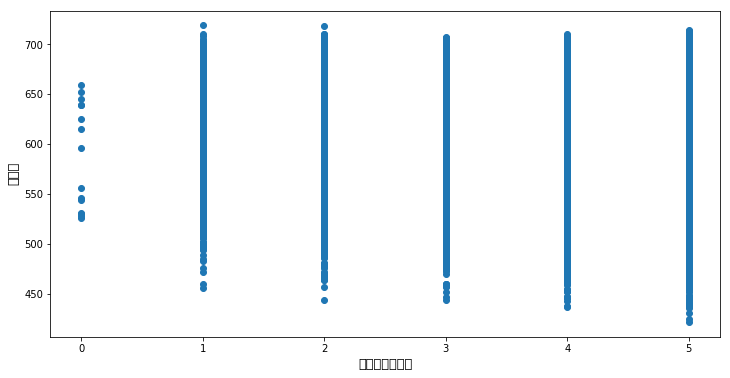

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(x=train['用户话费敏感度'], y=train['信用分'])
plt.xlabel("用户话费敏感度", fontsize=13)
plt.ylabel("信用分", fontsize=13)

In [12]:
# 看一下特征和目标变量的相关关系
features = [x for x in train.columns if x not in ['用户编码','信用分']]
values =[]
for feature in features:
    values.append(np.corrcoef(train[feature],train['信用分'])[0,1])
corr_df = pd.DataFrame({'feature': features,'corr_value': values})
corr_df.sort_values(by='corr_value')

,feature,corr_value
12,用户话费敏感度,-0.239400
4,是否4G不健康客户,-0.147162
22,当月物流快递类应用使用次数,0.001054
25,当月飞机类应用使用次数,0.014362
27,当月旅游资讯类应用使用次数,0.020780
2,是否大学生客户,0.025312
0,用户实名制是否通过核实,0.028927
26,当月火车类应用使用次数,0.032554
21,当月网购类应用使用次数,0.033495
1,用户年龄,0.037780


<BarContainer object of 28 artists>

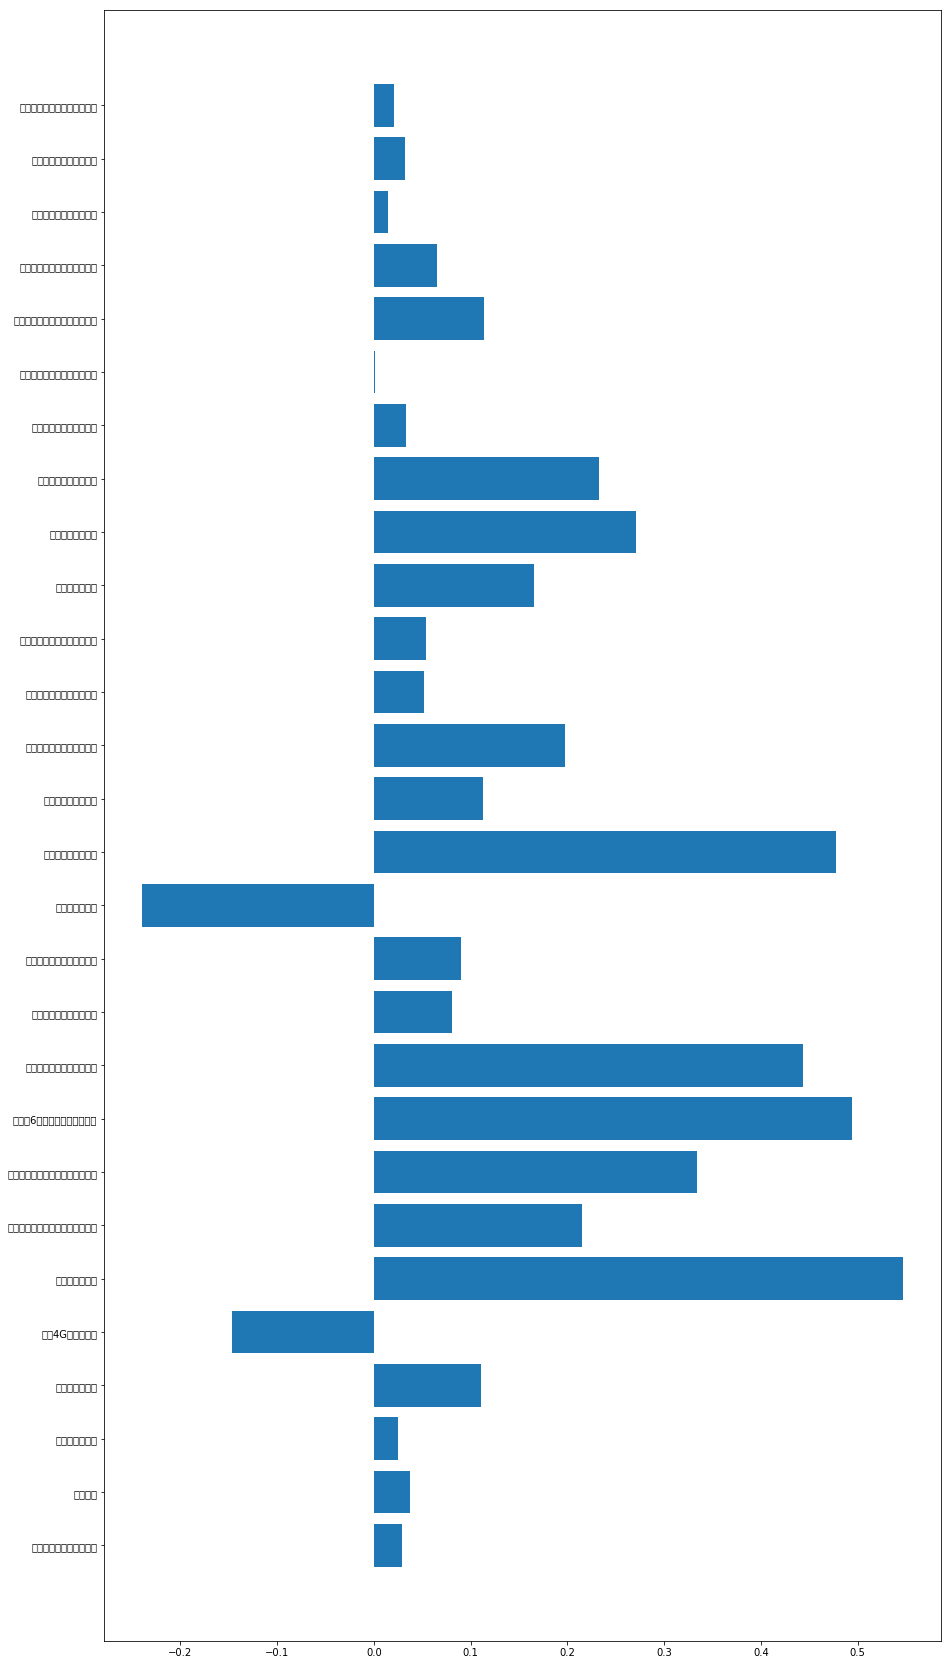

In [13]:
plt.figure(figsize=(15,30))
plt.barh(corr_df['feature'],corr_df['corr_value'],height=0.8)